# Day 08. Exercise 04
# Regression

## 0. Imports

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [34]:
df=pd.read_csv('../../datasets/checker_regression.csv')
df = df.fillna(0)
df = df.drop_duplicates()
df = df.set_index('uid')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, user_1 to user_8
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  29 non-null     int64  
 1   pageviews    29 non-null     float64
 2   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 928.0+ bytes


In [35]:
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, user_26 to user_16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   num_commits  6 non-null      int64  
 1   pageviews    6 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 144.0+ bytes


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [36]:
def crossval(model, n_splits, X, y):
    cv = KFold(n_splits=n_splits, random_state=21, shuffle=True)
    score = cross_val_score(model, X,y, cv=cv)
    rmse_train_list = []
    rmse_test_list = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)
        rmse_train = np.sqrt(mean_squared_error(y_train, train_predict))
        rmse_test = np.sqrt(mean_squared_error(y_test, test_predict))
        
        rmse_train_list.append(rmse_train)
        rmse_test_list.append(rmse_test)
        print(f"train - {rmse_train} | test - {rmse_test}")

    print(f"Average RMSE on crossval is {np.mean(rmse_test)}")

In [37]:
reg = LinearRegression()
crossval(reg, 10, X, y)


train - 61.35327112662008 | test - 57.85614740884658
train - 62.5462335194863 | test - 44.71218893425673
train - 61.14556371253599 | test - 83.19897138394585
train - 58.416728626194235 | test - 79.399015977114
train - 60.11026827841826 | test - 68.75614618929599
train - 60.619323028395335 | test - 65.92296908962915
train - 61.72075104991357 | test - 61.8003605530157
train - 62.60680682836641 | test - 46.68994292992783
train - 55.58034321272078 | test - 99.08124434288634
train - 61.57793245106181 | test - 53.24118830442656
Average RMSE on crossval is 53.24118830442656


In [38]:
tree = DecisionTreeRegressor(max_depth=4, random_state=21)
crossval(tree, 10, X, y)

train - 25.826445318273624 | test - 112.90417448323485
train - 20.831740879309105 | test - 75.3433277539361
train - 30.65910625237706 | test - 0.0
train - 30.290930114337808 | test - 80.50626902205723
train - 22.947069362846857 | test - 85.74728481121053
train - 23.518839397894013 | test - 76.68265065865315
train - 30.65910625237706 | test - 0.0
train - 25.338946641096623 | test - 61.15540484427085
train - 28.31179227652025 | test - 120.86588837737067
train - 29.73415849923869 | test - 40.58792924010783
Average RMSE on crossval is 40.58792924010783


In [39]:
RandForest = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=21)
crossval(RandForest, 10, X, y)

train - 20.93592899168309 | test - 97.5341111642225
train - 22.56249600516102 | test - 78.0014507873151
train - 26.59998282039094 | test - 20.678674351271315
train - 24.823967667287942 | test - 56.671739967976485
train - 22.39873674109602 | test - 77.70742455484391
train - 23.90908390938928 | test - 54.11850773148989
train - 25.097609521036365 | test - 8.141221739804578
train - 24.33054547471598 | test - 57.47461734531807
train - 21.77899545869128 | test - 91.79240109856771
train - 26.54817432310291 | test - 32.155805517822095
Average RMSE on crossval is 32.155805517822095


## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [40]:
reg.fit(X_train,y_train)
test_predict = reg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, test_predict))
rmse_test

np.float64(52.69818584468257)

Text(0.5, 1.0, 'Linear Regression Predictions vs Actuals')

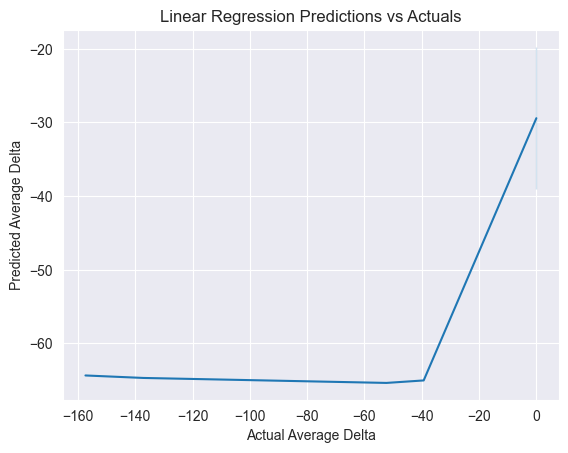

In [41]:
plt.Figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot(
    x=y_test,
    y=test_predict,

)
plt.xlabel('Actual Average Delta')
plt.ylabel('Predicted Average Delta')
plt.title(f'Linear Regression Predictions vs Actuals')

In [42]:
tree.fit(X_train,y_train)
test_predict = tree.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, test_predict))
rmse_test

np.float64(103.03038229534978)

Text(0.5, 1.0, 'Decision Tree Regression Predictions vs Actuals')

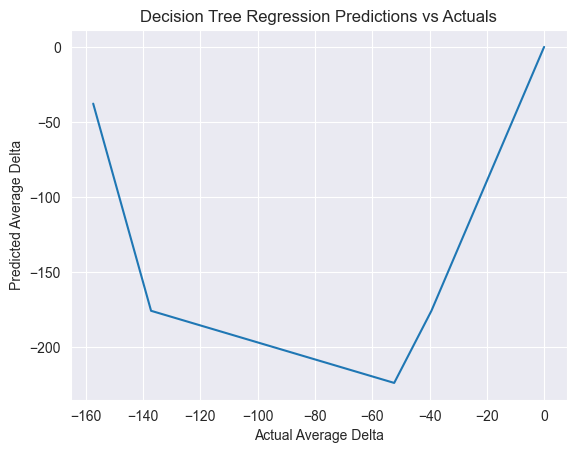

In [43]:
plt.Figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot(
    x=y_test,
    y=test_predict,

)
plt.xlabel('Actual Average Delta')
plt.ylabel('Predicted Average Delta')
plt.title(f'Decision Tree Regression Predictions vs Actuals')

In [44]:
RandForest.fit(X_train,y_train)
test_predict = RandForest.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, test_predict))
rmse_test

np.float64(84.33603542905045)

Text(0.5, 1.0, 'Random Forest Regression Predictions vs Actuals')

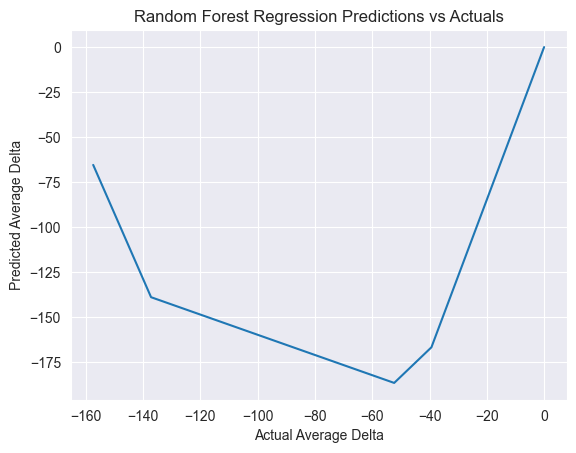

In [45]:
plt.Figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot(
    x=y_test,
    y=test_predict,

)
plt.xlabel('Actual Average Delta')
plt.ylabel('Predicted Average Delta')
plt.title(f'Random Forest Regression Predictions vs Actuals')

Diagonal